# **Movie Rating Prediction**

<img src="my_image.jpeg" alt="My image" width="800" height="400">


- Build a model that predicts the rating of a movie based on features like genre, director, and actors. You can use regression techniques to tackle this problem.
- The goal is to analyze historical movie data and develop a model that accurately estimates the rating given to a movie by users orcritics.
- Movie Rating Prediction project enables you to explore data analysis, preprocessing, feature engineering, and machine learning modeling techniques. It provides insights into the factorsthat influence movie ratings and allows you to build a model thatcan estimate the ratings of movies accurately.

#### libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Loading dataset
df = pd.read_csv("IMDb_Movies_India.csv", encoding="ISO-8859-1")
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


let combine Actor 1, Actor 2, Actor 3 columns

In [3]:
df["Actor"] = df['Actor 1'] + ', ' + df['Actor 2'] + ', ' + df['Actor 3']
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,"Manmauji, Birbal, Rajendra Bhatia"
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid"
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,"Sayani Gupta, Plabita Borthakur, Roy Angana"
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor"
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,"Rajat Kapoor, Rituparna Sengupta, Antara Mali"


In [4]:
# Last 5 entries
df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,"Naseeruddin Shah, Sumeet Saigal, Suparna Anand"
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,"Akshay Kumar, Twinkle Khanna, Aruna Irani"
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja,"Dharmendra, Jaya Prada, Arjun Sarja"


## **Data Preprocessing**

In [5]:
# Checking shape
df.shape

(15509, 11)

In [6]:
# Checking columns of dataset
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3', 'Actor'],
      dtype='object')

In [7]:
# Checking datatypes of dataset
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
Actor        object
dtype: object

In [8]:
# Unique values of dataset
df.nunique()

Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
Actor       12209
dtype: int64

In [9]:
# unique values of columns
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Unique values in {column}: {unique_values}')

Unique values in Name: [' ' '#Gadhvi (He thought he was Gandhi)' '#Homecoming' ... 'Zulmi Raj'
 'Zulmi Shikari' 'Zulm-O-Sitam']
Unique values in Year: [nan '(2019)' '(2021)' '(2010)' '(1997)' '(2005)' '(2008)' '(2012)'
 '(2014)' '(2004)' '(2016)' '(1991)' '(1990)' '(2018)' '(1987)' '(1948)'
 '(1958)' '(2017)' '(2020)' '(2009)' '(2002)' '(1993)' '(1946)' '(1994)'
 '(2007)' '(2013)' '(2003)' '(1998)' '(1979)' '(1951)' '(1956)' '(1974)'
 '(2015)' '(2006)' '(1981)' '(1985)' '(2011)' '(2001)' '(1967)' '(1988)'
 '(1995)' '(1959)' '(1996)' '(1970)' '(1976)' '(2000)' '(1999)' '(1973)'
 '(1968)' '(1943)' '(1953)' '(1986)' '(1983)' '(1989)' '(1982)' '(1977)'
 '(1957)' '(1950)' '(1992)' '(1969)' '(1975)' '(1947)' '(1972)' '(1971)'
 '(1935)' '(1978)' '(1960)' '(1944)' '(1963)' '(1940)' '(1984)' '(1934)'
 '(1955)' '(1936)' '(1980)' '(1966)' '(1949)' '(1962)' '(1964)' '(1952)'
 '(1933)' '(1942)' '(1939)' '(1954)' '(1945)' '(1961)' '(1965)' '(1938)'
 '(1941)' '(1931)' '(1937)' '(2022)' '(1932)' '(192

In [10]:
# Checking duplicates
df.duplicated().sum()

6

In [11]:
# Removing duplicates
df = df.drop_duplicates()

In [12]:
# Checking null values
df.isnull().sum()

Name           0
Year         527
Duration    8264
Genre       1876
Rating      7584
Votes       7583
Director     524
Actor 1     1615
Actor 2     2381
Actor 3     3140
Actor       3140
dtype: int64

In [13]:
df.isnull().sum() / len(df) * 100       # percentage of NaN values 

Name         0.000000
Year         3.399342
Duration    53.305812
Genre       12.100884
Rating      48.919564
Votes       48.913114
Director     3.379991
Actor 1     10.417339
Actor 2     15.358318
Actor 3     20.254144
Actor       20.254144
dtype: float64

<Axes: >

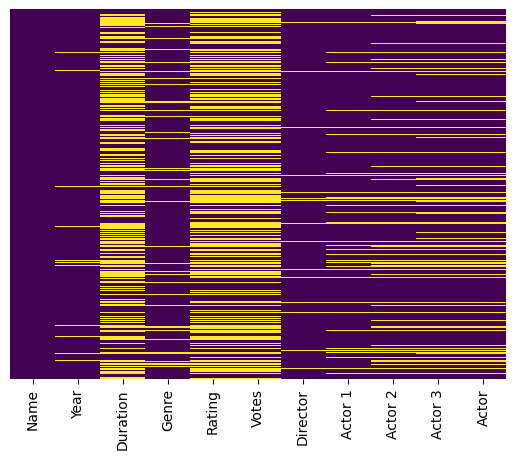

In [14]:
#visualize the NaN values in heatmap
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

**It is important to remove null values of Target variable**

In [15]:
# dropping columns of null values in 'Rating'
df.dropna(subset=['Rating'],inplace=True)

In [16]:
# Removing columns of NaN values
df.dropna(subset=['Actor 1','Actor 2','Actor 3','Director','Genre','Duration'],inplace=True)

In [17]:
# Remove parentheses from 'Year' column and convert to integer
df['Year'] = df['Year'].str.strip('()').astype(int)

In [18]:
# Remove commas from 'Votes' column and convert to integer
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)

In [19]:
# Remove min from 'Duration' column andDurationonvert to integer
df['Duration'] = df['Duration'].str.replace('min', '').astype(int)

In [20]:
df.isnull().sum()/len(df)*100

Name        0.0
Year        0.0
Duration    0.0
Genre       0.0
Rating      0.0
Votes       0.0
Director    0.0
Actor 1     0.0
Actor 2     0.0
Actor 3     0.0
Actor       0.0
dtype: float64

- *Data is cleaned now*

In [21]:
# first 5 entries
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid"
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor"
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor"
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma"
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia"


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int32  
 2   Duration  5659 non-null   int32  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int32  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
 10  Actor     5659 non-null   object 
dtypes: float64(1), int32(3), object(7)
memory usage: 464.2+ KB


## **Exploratory Data Analysis**

## Top 10 Movies

In [23]:
df.loc[df['Rating'].sort_values(ascending=False)[:10].index]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor
8339,Love Qubool Hai,2020,94,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari,"Ahaan Jha, Mahesh Narayan, Rajasree Rajakumari"
5410,Half Songs,2021,79,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani,"Raj Banerjee, Emon Chatterjee, Purshottam Mulani"
6852,June,2021,93,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi,"Vaibhav Khisti, Nilesh Divekar, Jitendra Joshi"
14222,The Reluctant Crime,2020,113,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha,"Dharmendra Ahir, Awanish Kotnal, Rakhi Mansha"
5077,Gho Gho Rani,2019,105,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar,"Nishi Neha Mishra, Pankaj Kamal, Akash Kumar"
1314,Ashok Vatika,2018,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi,"Kunj Anand, Sanjay Bishnoi, Paras Zutshi"
13231,Sindhustan,2019,64,"Documentary, Family, History",9.3,36,Sapna Bhavnani,Leila Advani,Laj Badlani,Chaho Bhara,"Leila Advani, Laj Badlani, Chaho Bhara"
8344,Love Sorries,2021,101,"Comedy, Drama, Romance",9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta,"Prashant Chaubey, Puneet Chouksey, Amitabh Gupta"
12673,Secrets of Sinauli,2021,56,"Documentary, History",9.3,1373,Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit,"Manoj Bajpayee, R.S. Bhist, K.N. Dixit"
11843,Refl3ct,2021,65,Sci-Fi,9.3,467,Nikhil Mahar,Vijay Mahar,Vijay Mahar,Nikhil Mahar,"Vijay Mahar, Vijay Mahar, Nikhil Mahar"


## Plotting of top 10 Movies Ratings

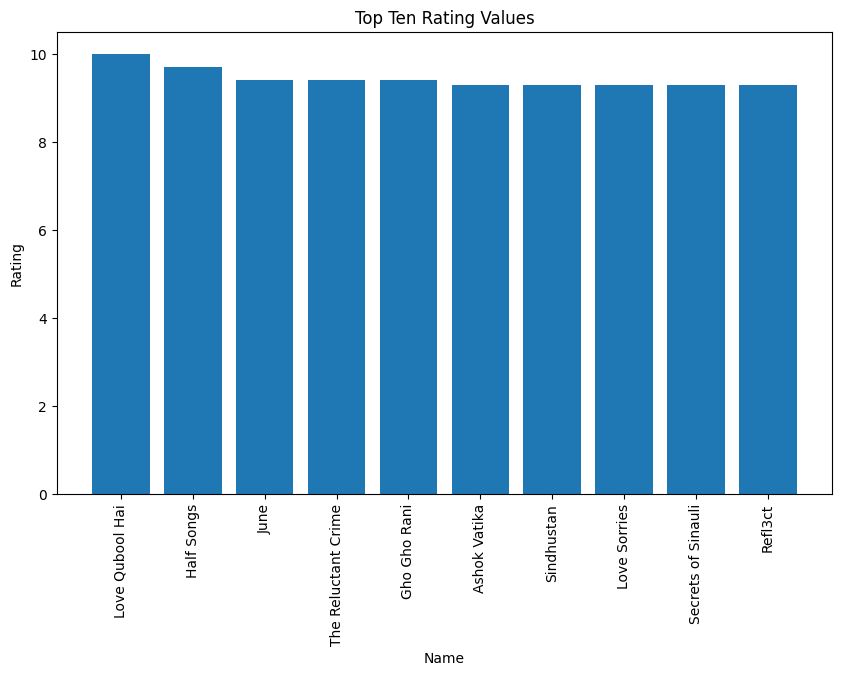

In [24]:
# Sort the DataFrame by the specified column in descending order
sorted_df = df.sort_values(by='Rating', ascending=False)

# Get the top ten values and corresponding names from the sorted DataFrame
top_ten_values = sorted_df.head(10)

# Create a bar plot for the top ten values with corresponding names
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), top_ten_values['Rating'])
plt.xticks(range(1, 11), top_ten_values['Name'], rotation=90)
plt.xlabel('Name')
plt.ylabel('Rating')
plt.title(f'Top Ten Rating Values')
plt.show()

## Top 10 plots for columns

In [25]:
def TopTenPlot(column):
    df
    df[column].value_counts().sort_values(ascending=False)[:10].plot(kind="bar", figsize=(20,6), edgecolor="k")
    plt.xticks(rotation=90)
    plt.title("Top Ten {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

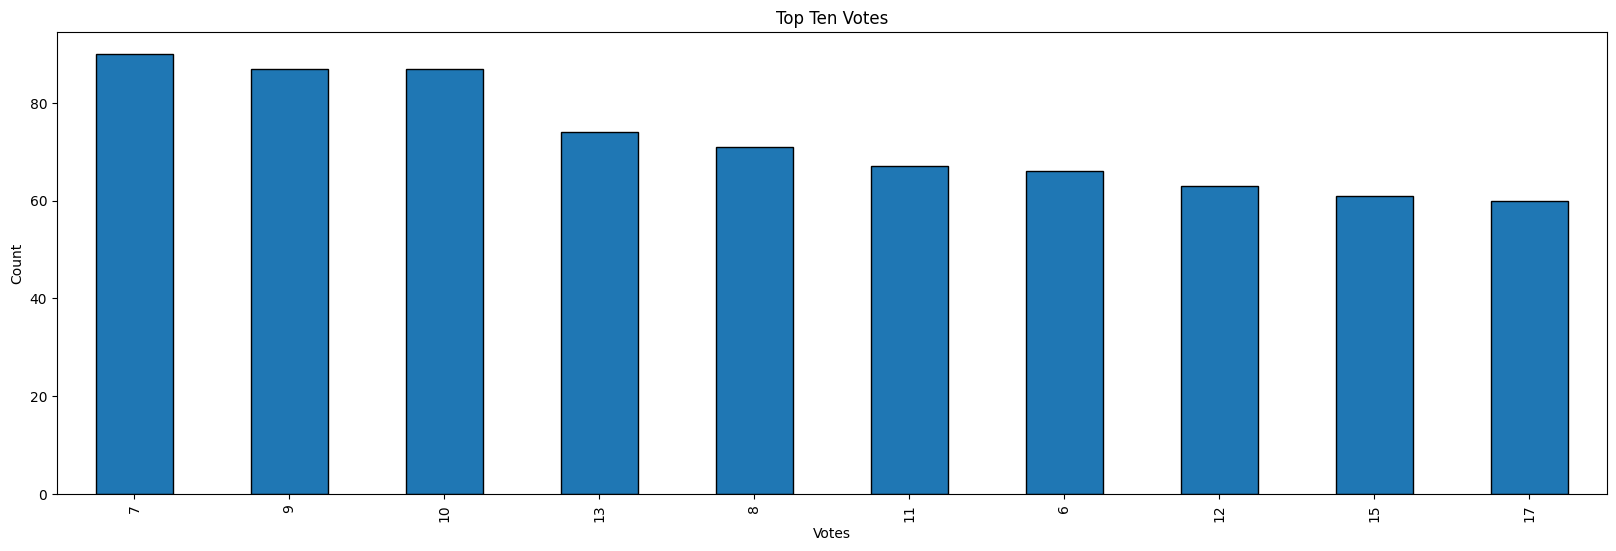

In [26]:
# Top 10 "Directors"
TopTenPlot("Votes")

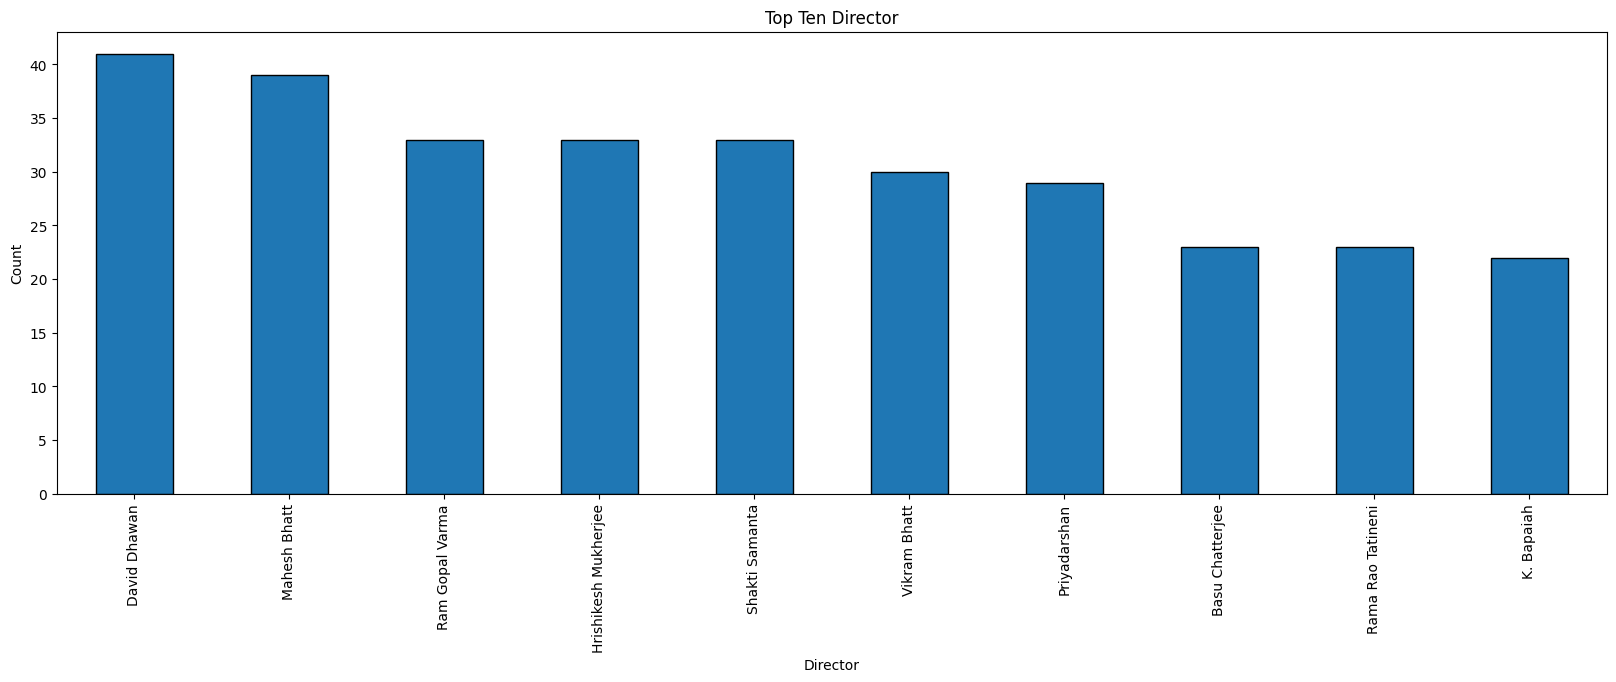

In [27]:
# Top 10 "Directors"
TopTenPlot("Director")

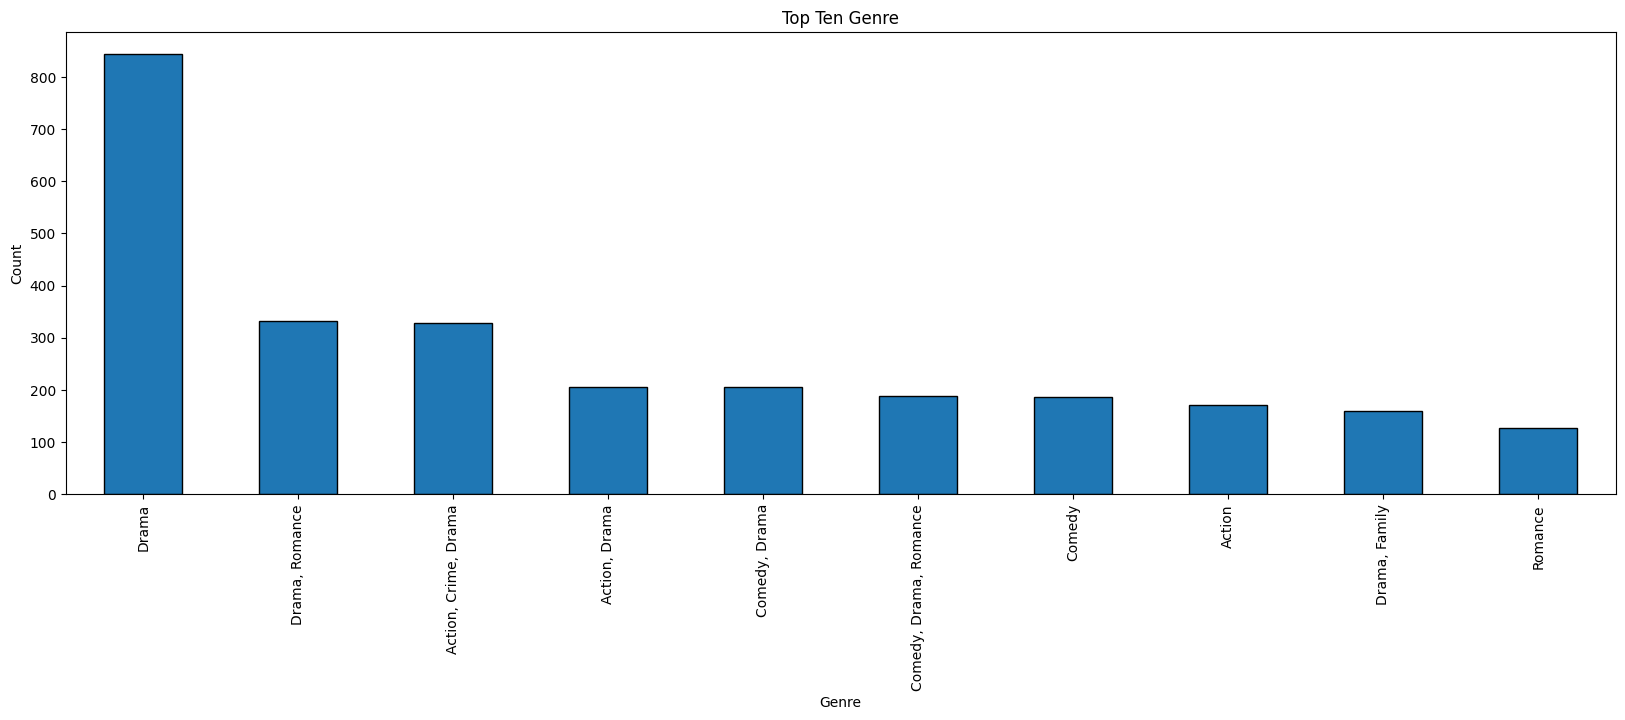

In [28]:
# Top 10 "Genre"
TopTenPlot("Genre")

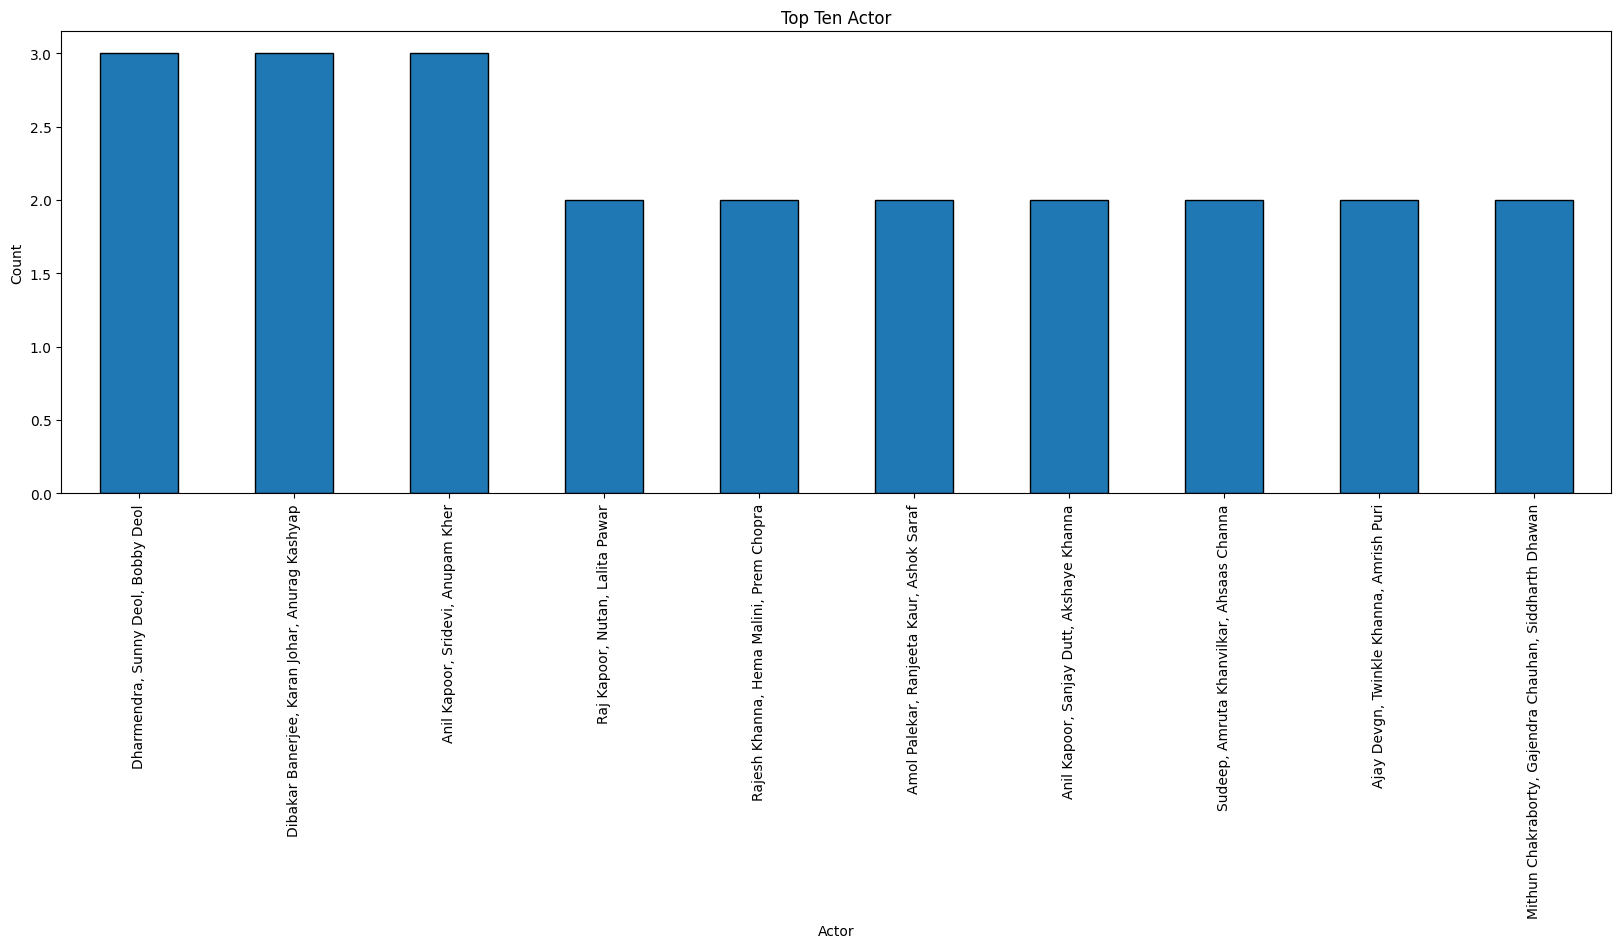

In [40]:
# Top 10 "Actor"
TopTenPlot("Actor")

C:\Users\HP\AppData\Local\Temp\ipykernel_11244\460318135.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True, bins=11, color='orange', ax=axes[i])
C:\Users\HP\AppData\Local\Temp\ipykernel_11244\460318135.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True, b

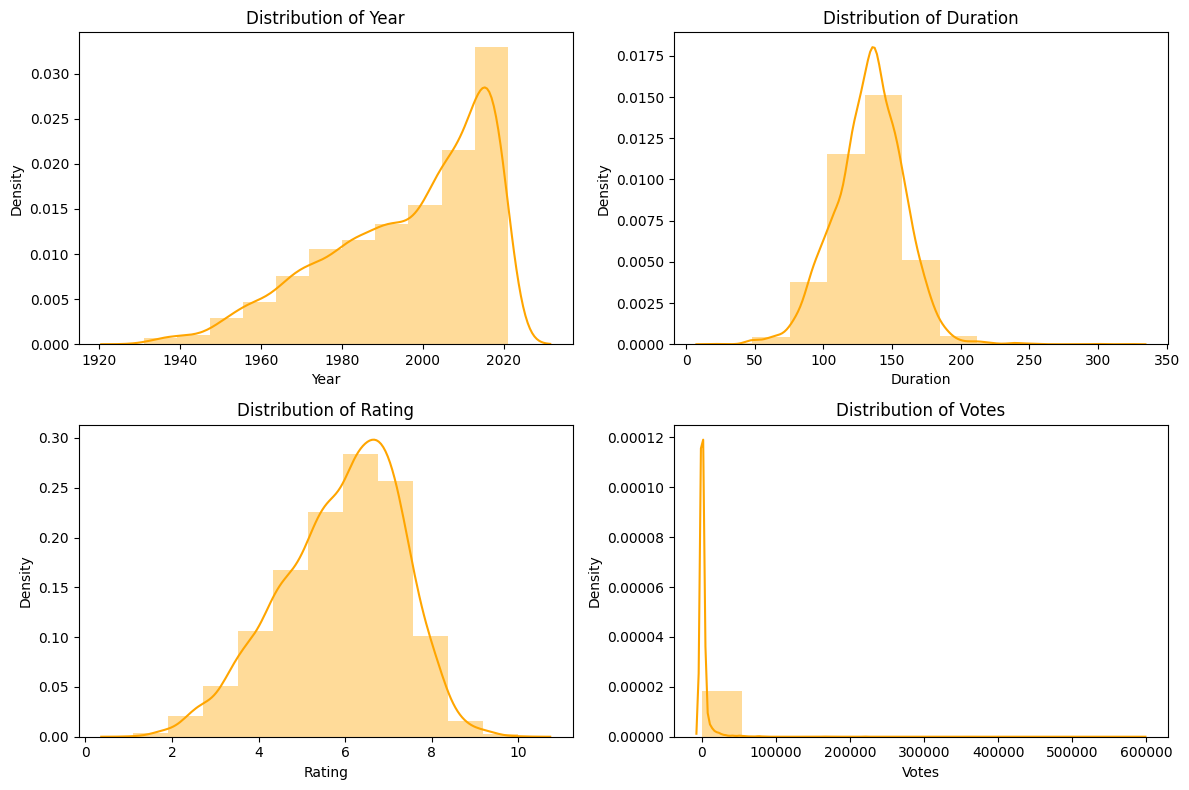

In [30]:
# Create a distribution plot (histogram)
cols = df.select_dtypes(include=['int64', 'float64','int32'])
# cols = df.select_dtypes(include=['number'])
num_rows = len(cols.columns) // 2
num_cols = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(cols.columns):
    sns.distplot(df[col], kde=True, bins=11, color='orange', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

## Plotting Correlation Matrics

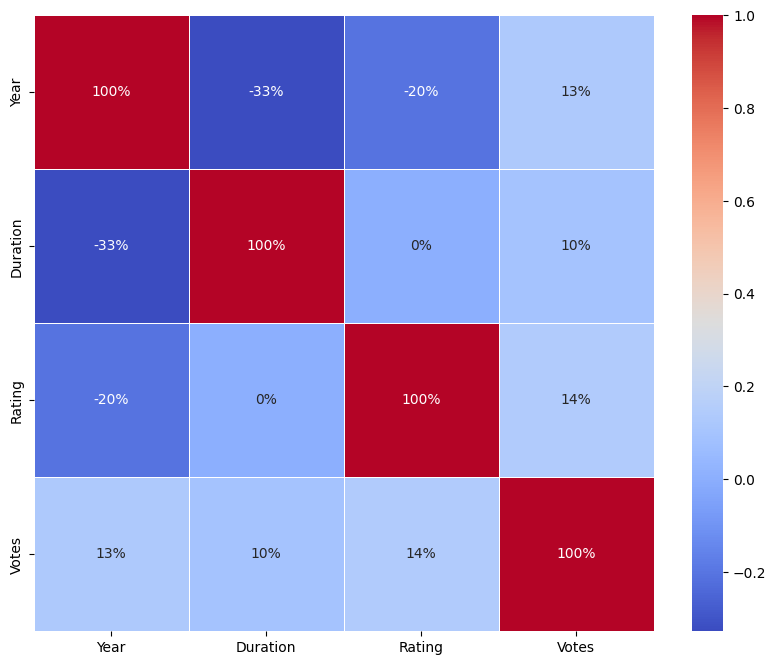

In [31]:
# Plotting the Correlation Matrix
numerical_columns = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".0%", linewidths=0.5)
plt.show()

In [32]:
# Convert input features into Object to "numbers"
df["Directors"] = df['Director'].astype('category').cat.codes
df["Genres"] = df['Genre'].astype('category').cat.codes
df["Actors"] = df['Actor'].astype('category').cat.codes
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",629,229,3875
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",1335,184,3343
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1530,157,1119
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",2044,289,2086
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",135,320,5562


## **Define Input features & Target Variable**

In [33]:
X = df[['Year','Duration', 'Votes','Directors','Genres','Actors']]
y = df['Rating']

# Shapes of X and y
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (5659, 6)
Shape of y:  (5659,)


In [34]:
# Scaling the data 
from sklearn.preprocessing import MinMaxScaler

# Select only the numeric columns for scaling
numeric_columns = X[["Duration"	,"Votes"	,"Directors",	"Genres",	"Actors"]].columns

X_scaled = X.copy()  

scaler = MinMaxScaler()
X_scaled[numeric_columns] = scaler.fit_transform(X_scaled[numeric_columns])
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Shapes
print("Shape of X_scaled: ", X_scaled.shape)
print("Shape of y_scaled: ", y_scaled.shape)

Shape of X_scaled:  (5659, 6)
Shape of y_scaled:  (5659, 1)


## Splitting the Data

In [35]:
from sklearn.model_selection import train_test_split
# Spliting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.25, random_state=42)

In [36]:
# Shapes
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (4244, 6)
y_train shape: (4244,)
X_test shape: (1415, 6)
y_test shape: (1415,)


## **Model Development**

In [37]:
#  Import library & Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting the model
model.fit(X_train, y_train)

# Predicting X_test
y_pred= model.predict(X_test)

Evaluation

In [38]:
# Import metrics
from sklearn.metrics import (r2_score, mean_squared_error,
                              mean_absolute_error)

r2 = r2_score(y_test, y_pred)
print("R2_Score: ",r2 )

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ",mae )

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ",mse )

rmse = mae ** 0.5
print("Root Mean Squared Error", rmse)

R2_Score:  0.08508756947961349
Mean Absolute Error:  1.0399172889778225
Mean Squared Error:  1.671019742140579
Root Mean Squared Error 1.0197633494972362


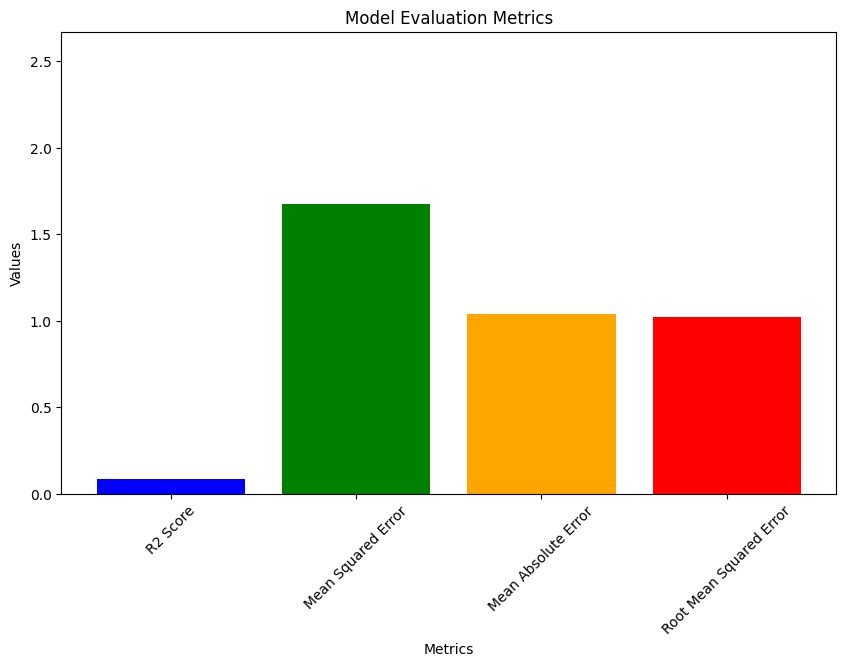

In [39]:
metrics = {
    'R2 Score': r2,
    'Mean Squared Error': mse,
    'Mean Absolute Error': mae,
    'Root Mean Squared Error': rmse
}
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

plt.figure(figsize=(10, 6))
plt.bar(metric_names, metric_values, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Model Evaluation Metrics')
plt.ylim(0, max(metric_values) + 1)  
plt.xticks(rotation=45)  
plt.show()

---
## September 27, 2023